<a href="https://colab.research.google.com/github/Poorvaahuja/DecisionTreeAIML/blob/main/DecisionTreeAIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = load_iris()

In [3]:
X = data.data
y = data.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
import numpy as np
from collections import Counter

In [14]:
# Function to calculate entropy
def entropy(y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

In [15]:
# Function to calculate Information Gain
def information_gain(y, y_left, y_right):
    H_y = entropy(y)
    H_y_left = entropy(y_left)
    H_y_right = entropy(y_right)
    p_left = len(y_left) / len(y)
    p_right = len(y_right) / len(y)
    return H_y - (p_left * H_y_left + p_right * H_y_right)

In [16]:
def split_information(y_left, y_right):
    total = len(y_left) + len(y_right)
    p_left = len(y_left) / total
    p_right = len(y_right) / total
    return - (p_left * np.log2(p_left) + p_right * np.log2(p_right)) if p_left > 0 and p_right > 0 else 0

In [17]:
# Function to calculate Gain Ratio
def gain_ratio(y, y_left, y_right):
    ig = information_gain(y, y_left, y_right)
    si = split_information(y_left, y_right)
    return ig / si if si != 0 else 0

In [21]:
def train_evaluate_model():
  clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
  clf.fit(X_train, y_train)

  # Predict on the test data
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)

  print("Decision Tree with Entropy (Information Gain) criterion")
  print(f"Accuracy: {accuracy:.2f}")
  print("Classification Report:\n", report)
  # Calculate Gain Ratio for each split
  print("\nGain Ratio Calculation for Each Split:")
  node_indices = clf.tree_.children_left >= 0  # Nodes that split
  feature_indices = clf.tree_.feature[node_indices]
  thresholds = clf.tree_.threshold[node_indices]
  for i, (feature, threshold) in enumerate(zip(feature_indices, thresholds)):
        left_indices = X_train[:, feature] <= threshold
        right_indices = X_train[:, feature] > threshold
        y_left, y_right = y_train[left_indices], y_train[right_indices]

        # Calculate Information Gain and Gain Ratio
        ig = information_gain(y_train, y_left, y_right)
        gr = gain_ratio(y_train, y_left, y_right)

        print(f"Split {i + 1}: Feature {feature}, Threshold {threshold}")
        print(f"  Information Gain: {ig:.4f}")
        print(f"  Gain Ratio: {gr:.4f}")
        print("-" * 40)

In [22]:
train_evaluate_model()

Decision Tree with Entropy (Information Gain) criterion
Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Gain Ratio Calculation for Each Split:
Split 1: Feature 2, Threshold 2.449999988079071
  Information Gain: 0.8754
  Gain Ratio: 1.0000
----------------------------------------
Split 2: Feature 2, Threshold 4.75
  Information Gain: 0.7006
  Gain Ratio: 0.7259
----------------------------------------
Split 3: Feature 3, Threshold 1.600000023841858
  Information Gain: 0.6373
  Gain Ratio: 0.6940
----------------------------------------
Split 4: Feature 2, Threshold 5.1499998569488525
  Information Gain: 0.4981
  Gain Rat

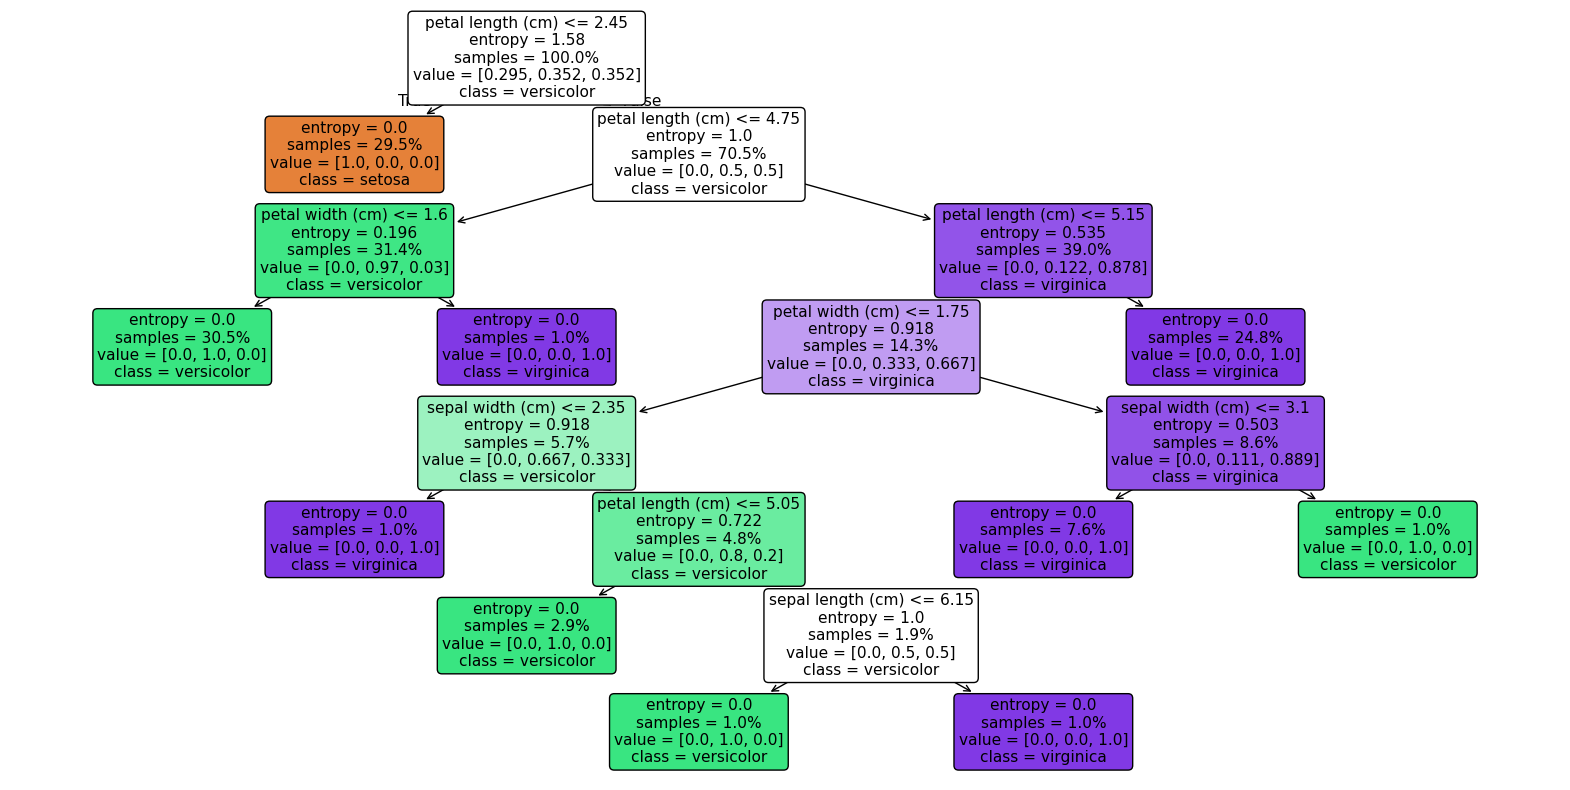

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train a Decision Tree model
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True,
    rounded=True,
    impurity=True,
    proportion=True
)
plt.show()

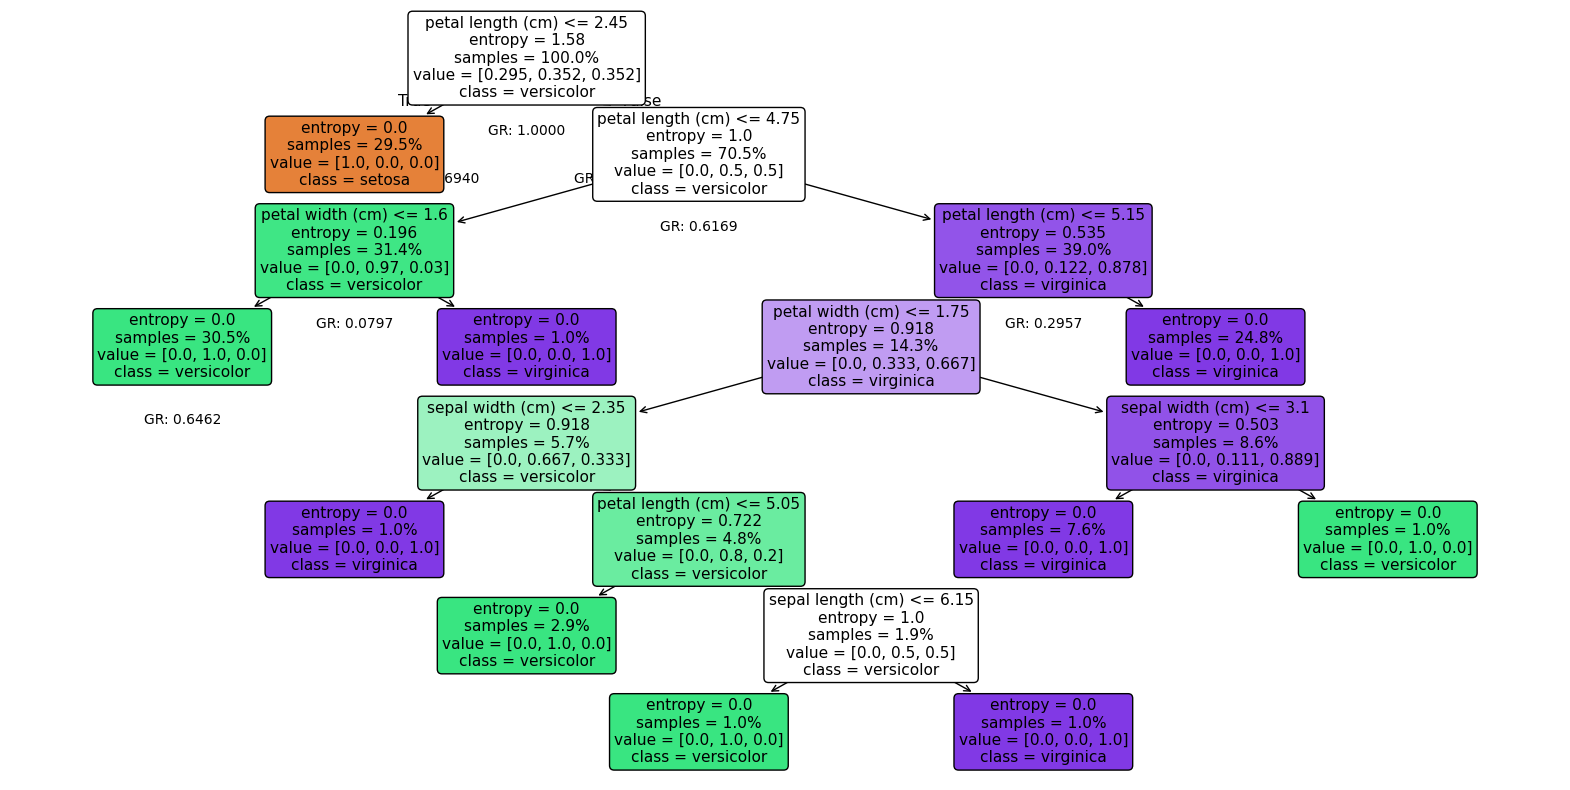

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Calculate Gain Ratios for each split and store them
node_gain_ratios = []
node_information_gains = []

node_indices = clf.tree_.children_left >= 0  # Nodes that split
feature_indices = clf.tree_.feature[node_indices]
thresholds = clf.tree_.threshold[node_indices]

for feature, threshold in zip(feature_indices, thresholds):
    left_indices = X_train[:, feature] <= threshold
    right_indices = X_train[:, feature] > threshold
    y_left, y_right = y_train[left_indices], y_train[right_indices]

    # Calculate Information Gain and Gain Ratio
    ig = information_gain(y_train, y_left, y_right)
    gr = gain_ratio(y_train, y_left, y_right)

    node_information_gains.append(f"IG: {ig:.4f}")
    node_gain_ratios.append(f"GR: {gr:.4f}")

# Plot the tree with custom text annotations
plt.figure(figsize=(20, 10))
tree_plot = plot_tree(
    clf,
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True,
    rounded=True,
    impurity=True,
    proportion=True
)

# Add custom annotations for Gain Ratios
for i, text in enumerate(node_gain_ratios):
    plt.text(
        tree_plot[i].get_position()[0],
        tree_plot[i].get_position()[1] - 0.1,  # Adjust y-position slightly
        text,
        ha="center",
        fontsize=10,
        color="black"
    )

plt.show()
